In [1]:
#coding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
#データセット読み込み
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stadium = pd.read_csv("stadium.csv")
sample = pd.read_csv("sample_submit.csv", header=None)
cond = pd.read_csv("condition.csv")
cond_add = pd.read_csv("condition_add.csv")
data_2014 = pd.read_csv("2014_add.csv")
train_add = pd.read_csv("train_add.csv")

In [3]:
y = train["y"]
train = train.drop("y", axis=1)
train.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [4]:
df = pd.concat([train, test])
#idをkeyにしてファイルを結合
df = pd.merge(df, cond, left_on="id", right_on="id")
#df = pd.merge(df, stadium, left_on="stadium", right_on="name")
df.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [5]:
df["time"] = df["time"].apply(lambda x: x.split(":")[0]).astype("float")
df["humidity"] = df["humidity"].apply(lambda x: x.split("%")[0]).astype("float")
df["week"] = df["gameday"].apply(lambda x: list(x)[-2])
df.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,week
0,13994,2012,Ｊ１,第１節第１日,03/10(土),14.0,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,3.8,66.0,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,土
1,13995,2012,Ｊ１,第１節第１日,03/10(土),14.0,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,1,0,屋内,12.4,43.0,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,土
2,13996,2012,Ｊ１,第１節第１日,03/10(土),14.0,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,2,3,晴一時雨,11.3,41.0,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,土
3,13997,2012,Ｊ１,第１節第１日,03/10(土),14.0,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,1,0,曇一時雨のち晴,11.4,52.0,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,土
4,13998,2012,Ｊ１,第１節第１日,03/10(土),14.0,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,0,0,屋内,22.5,32.0,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,土


In [6]:
df["temperature"] = df["temperature"] / df["temperature"].max()
df["humidity"] = df["humidity"] / df["humidity"].max()
df["time"] = df["time"] / df["time"].max()
df.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,week
0,13994,2012,Ｊ１,第１節第１日,03/10(土),0.7,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,0.111111,0.666667,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,土
1,13995,2012,Ｊ１,第１節第１日,03/10(土),0.7,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋,1,0,屋内,0.362573,0.434343,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,土
2,13996,2012,Ｊ１,第１節第１日,03/10(土),0.7,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪,2,3,晴一時雨,0.330409,0.414141,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,土
3,13997,2012,Ｊ１,第１節第１日,03/10(土),0.7,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島,1,0,曇一時雨のち晴,0.333333,0.525253,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,土
4,13998,2012,Ｊ１,第１節第１日,03/10(土),0.7,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌,0,0,屋内,0.657895,0.323232,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,土


In [7]:
df = pd.get_dummies(df[["week", "stage", "temperature", "humidity", "time", "stadium", "weather"]])
train = df.iloc[:1721, :]
test = df.iloc[1721:, :]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1720
Columns: 107 entries, temperature to weather_雪のち雨
dtypes: float64(3), uint8(104)
memory usage: 228.6 KB


In [9]:
x_train, x_test, y_train, y_test = train_test_split(train, y, random_state=7)

forest = RFR(max_depth=30, n_estimators=10, random_state=709)
#forest.fit(x_train, y_train)
#print("train score", forest.score(x_train, y_train))
#print("test score", forest.score(x_test, y_test))

In [10]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Nadam
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

C:\Users\madoc\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
def create_model():
    
    model = Sequential()
    model.add(Dense(107, input_dim=107, activation="relu"))
    model.add(Dense(214, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))

    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [16]:
epochs = 10
estimator = KerasRegressor(build_fn=create_model, epochs=epochs, batch_size=10, verbose=1, validation_split=0.2)
results = estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("keras REG mse = {:.4f}".format(mse ** 0.5))

Train on 1032 samples, validate on 258 samples
Epoch 1/10
1032/1032 [==============================] - 1s 595us/step - loss: 181620732.8488 - val_loss: 149064884.5271
Epoch 2/10
1032/1032 [==============================] - 0s 246us/step - loss: 93682898.6623 - val_loss: 56336442.6047
Epoch 3/10
1032/1032 [==============================] - 0s 252us/step - loss: 50533111.5979 - val_loss: 42244638.6202
Epoch 4/10
1032/1032 [==============================] - 0s 262us/step - loss: 41280748.0862 - val_loss: 34739008.1240
Epoch 5/10
1032/1032 [==============================] - 0s 249us/step - loss: 34942788.5281 - val_loss: 28997401.1473
Epoch 6/10
1032/1032 [==============================] - 0s 251us/step - loss: 31174198.2582 - val_loss: 25564930.3643
Epoch 7/10
1032/1032 [==============================] - 0s 261us/step - loss: 28995678.0422 - val_loss: 22770046.1938
Epoch 8/10
1032/1032 [==============================] - 0s 248us/step - loss: 26024447.6289 - val_loss: 20953955.4922
Epoch 9

In [17]:
estimator.score(x_test, y_test)

431/431 [==============================] - 0s 116us/step


-18736292.927494198

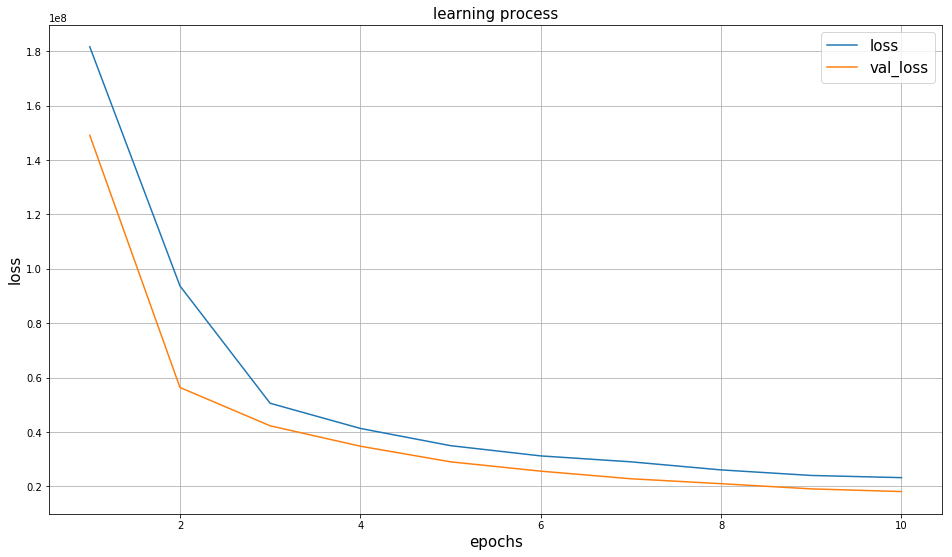

In [18]:
fontsize=15
plt.figure(figsize=(16, 9))
plt.plot(range(1, epochs+1), results.history["loss"], label="loss")
plt.plot(range(1, epochs+1), results.history["val_loss"], label="val_loss")
plt.xlabel("epochs", fontsize=fontsize)
plt.ylabel("loss", fontsize=fontsize)
plt.title("learning process", fontsize=fontsize)
plt.legend(loc="best", fontsize=fontsize)
plt.grid(True)
#plt.savefig("学習過程.png", dpi=300)
plt.show()

In [60]:
sample[1] = estimator.predict(test)
sample.to_csv("submit_0812_5.csv", header=None, index=None)

313/313 [==============================] - 0s 96us/step
